# Phase 5: Statistical Visualization & Trend Analysis

**Executive Summary:**
Visual storytelling is utilized here to uncover correlations and hidden patterns within the launch data. Through a series of statistical plots, we analyze the relationship between flight number, payload mass, and orbit types, providing a visual confirmation of the factors that most heavily influence landing success.

**Objectives:**
- Construct scatter plots to visualize the relationship between flight number and payload mass relative to landing success.
- Generate categorical bar charts to compare success rates across different orbital paths (LEO, GTO, SSO, etc.).
- Identify potential outliers and data clusters that may affect machine learning model boundaries.
- Document visual insights to inform the final feature selection for predictive modeling.

**Acknowledgments:**
- Original lab structure from IBM Data Science Professional Certificate

## 1) IMPORTING LIBRARIES

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print(" Environment configured successfully")
print(f"  - Pandas version: {pd.__version__}")
print(f"  - NumPy version: {np.__version__}")
print(f"  - Seaborn version: {sns.__version__}")

 Environment configured successfully
  - Pandas version: 2.3.3
  - NumPy version: 2.3.5
  - Seaborn version: 0.13.2


## 2) DATA LOADING & INITIAL EXPLORATION

In [3]:
# Load SpaceX launch dataset
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(data_url)

print(f"\n Dataset loaded successfully")
print(f"  - Shape: {df.shape}")
print(f"  - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few records
print("\n[First 5 Records]")
print(df.head())


 Dataset loaded successfully
  - Shape: (90, 18)
  - Memory usage: 0.04 MB

[First 5 Records]
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9     6104.959   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9      525.000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9      677.000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9      500.000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9     3170.000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN  1.000   
1    None None        1     False   False  False        NaN  1.000   
2    None None        1     False   False  False        NaN  1.000   
3  False Ocean        1     False   False  False        NaN  1.000   
4    None None        1     False   False  False        NaN  1.000   

   Reused

In [4]:
# Dataset structure
print("\n[Dataset Information]")
print(df.info())

# Statistical summary
print("\n[Statistical Summary]")
print(df.describe())

# Check for missing values
print("\n[Missing Values Analysis]")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✓ No missing values detected")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Class distribution (success vs failure)
print("\n[Target Variable Distribution]")
print(df['Class'].value_counts())
print(f"\nSuccess Rate: {df['Class'].mean() * 100:.2f}%")


[Dataset Information]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class         

## 3) EXPLORATORY DATA ANALYSIS


[3.1] Analyzing Flight Number vs Payload Mass
------------------------------------------------------------


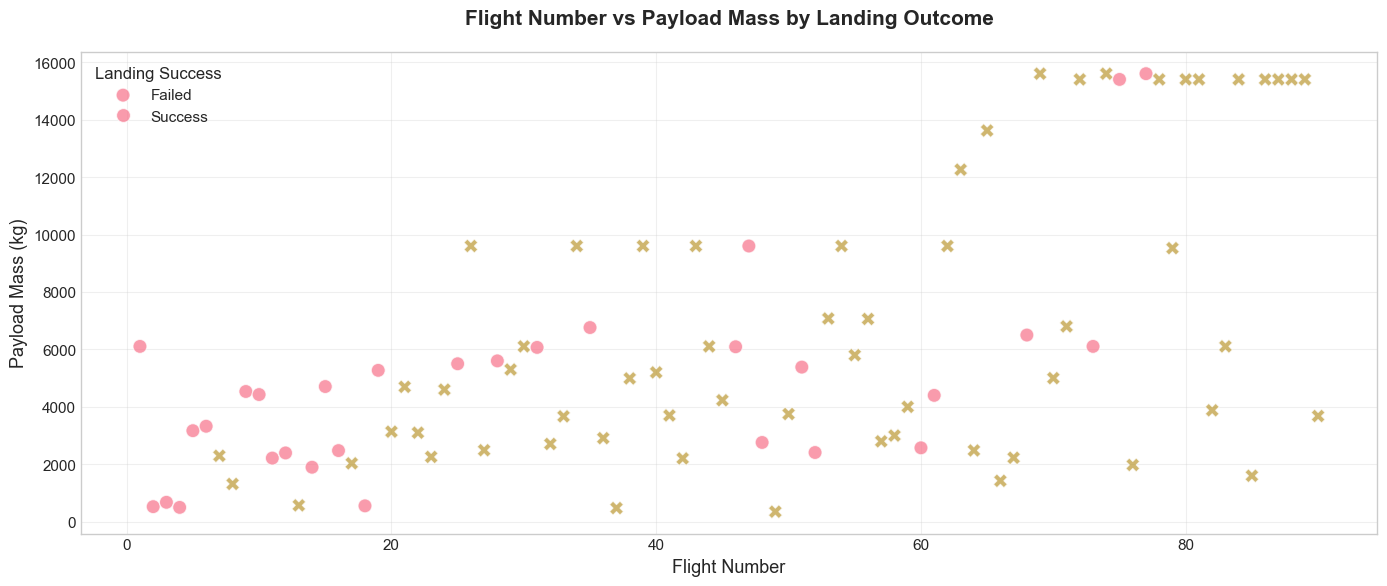


KEY OBSERVATIONS:
- Early flights (low flight numbers) show higher failure rates
- Success rate improves as flight number increases (learning curve)
- Heavier payloads appear to correlate with lower success rates
- Technology and experience improvements visible over time



In [5]:
# 1) Flight Number vs Payload Mass (Initial Pattern Recognition)

print("\n[3.1] Analyzing Flight Number vs Payload Mass")
print("-" * 60)

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x="FlightNumber", y="PayloadMass", 
                hue="Class", style="Class", s=100, alpha=0.7)
plt.xlabel("Flight Number", fontsize=13)
plt.ylabel("Payload Mass (kg)", fontsize=13)
plt.title("Flight Number vs Payload Mass by Landing Outcome", 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Landing Success', labels=['Failed', 'Success'], 
           fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("""
KEY OBSERVATIONS:
- Early flights (low flight numbers) show higher failure rates
- Success rate improves as flight number increases (learning curve)
- Heavier payloads appear to correlate with lower success rates
- Technology and experience improvements visible over time
""")


[TASK 1] Relationship: Flight Number vs Launch Site
------------------------------------------------------------


<Figure size 1400x700 with 0 Axes>

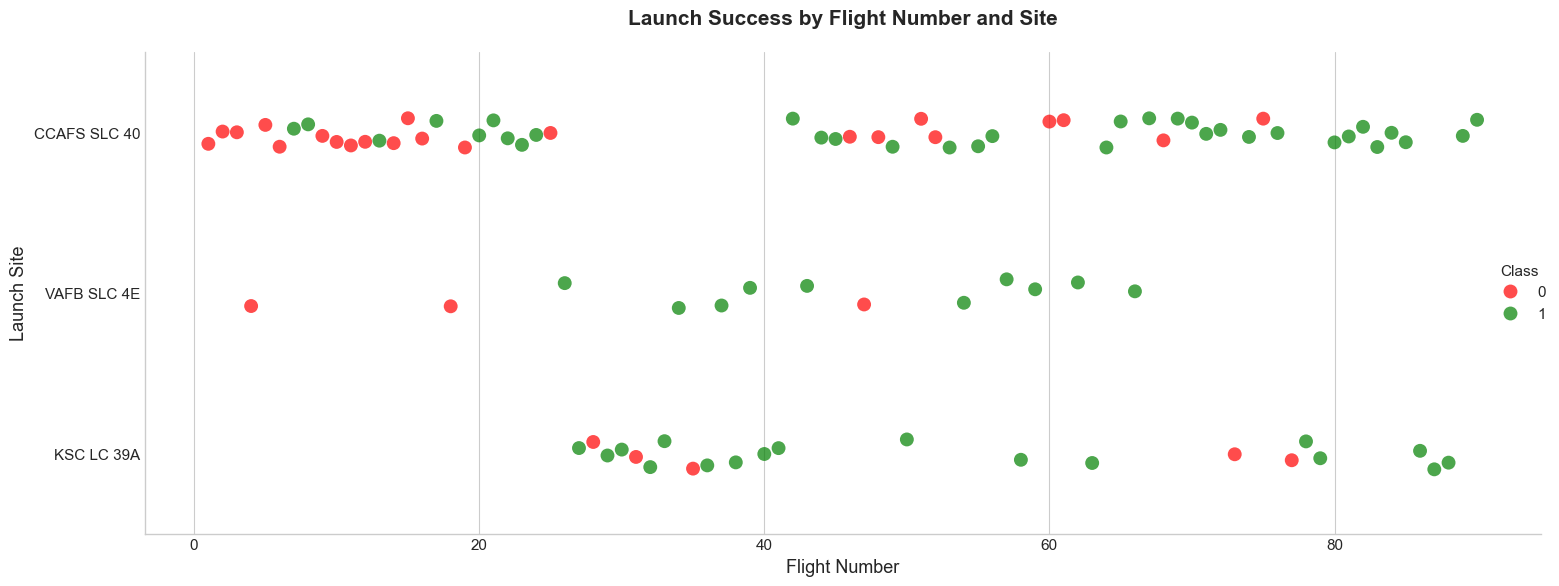


[Launch Site Performance Summary]
              Total_Launches  Successful_Landings  Success_Rate  \
LaunchSite                                                        
KSC LC 39A                22                   17         0.773   
VAFB SLC 4E               13                   10         0.769   
CCAFS SLC 40              55                   33         0.600   

              Success_Rate_Pct  
LaunchSite                      
KSC LC 39A              77.300  
VAFB SLC 4E             76.900  
CCAFS SLC 40            60.000  

INSIGHTS:
- Different launch sites show varying success patterns
- Some sites may have operational advantages or better conditions
- Site selection could be a strategic factor in mission planning



In [6]:
# TASK 1: Flight Number vs Launch Site

print("\n[TASK 1] Relationship: Flight Number vs Launch Site")
print("-" * 60)

plt.figure(figsize=(14, 7))
sns.catplot(data=df, x="FlightNumber", y="LaunchSite", 
            hue="Class", aspect=2.5, height=6, 
            palette={0: 'red', 1: 'green'}, alpha=0.7, s=100)
plt.xlabel("Flight Number", fontsize=13)
plt.ylabel("Launch Site", fontsize=13)
plt.title("Launch Success by Flight Number and Site", 
          fontsize=15, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Analyze success rate by launch site
site_analysis = df.groupby('LaunchSite').agg({
    'Class': ['count', 'sum', 'mean']
}).round(3)
site_analysis.columns = ['Total_Launches', 'Successful_Landings', 'Success_Rate']
site_analysis['Success_Rate_Pct'] = (site_analysis['Success_Rate'] * 100).round(2)
site_analysis = site_analysis.sort_values('Success_Rate_Pct', ascending=False)

print("\n[Launch Site Performance Summary]")
print(site_analysis)

print("""
INSIGHTS:
- Different launch sites show varying success patterns
- Some sites may have operational advantages or better conditions
- Site selection could be a strategic factor in mission planning
""")


[TASK 2] Relationship: Payload Mass vs Launch Site
------------------------------------------------------------


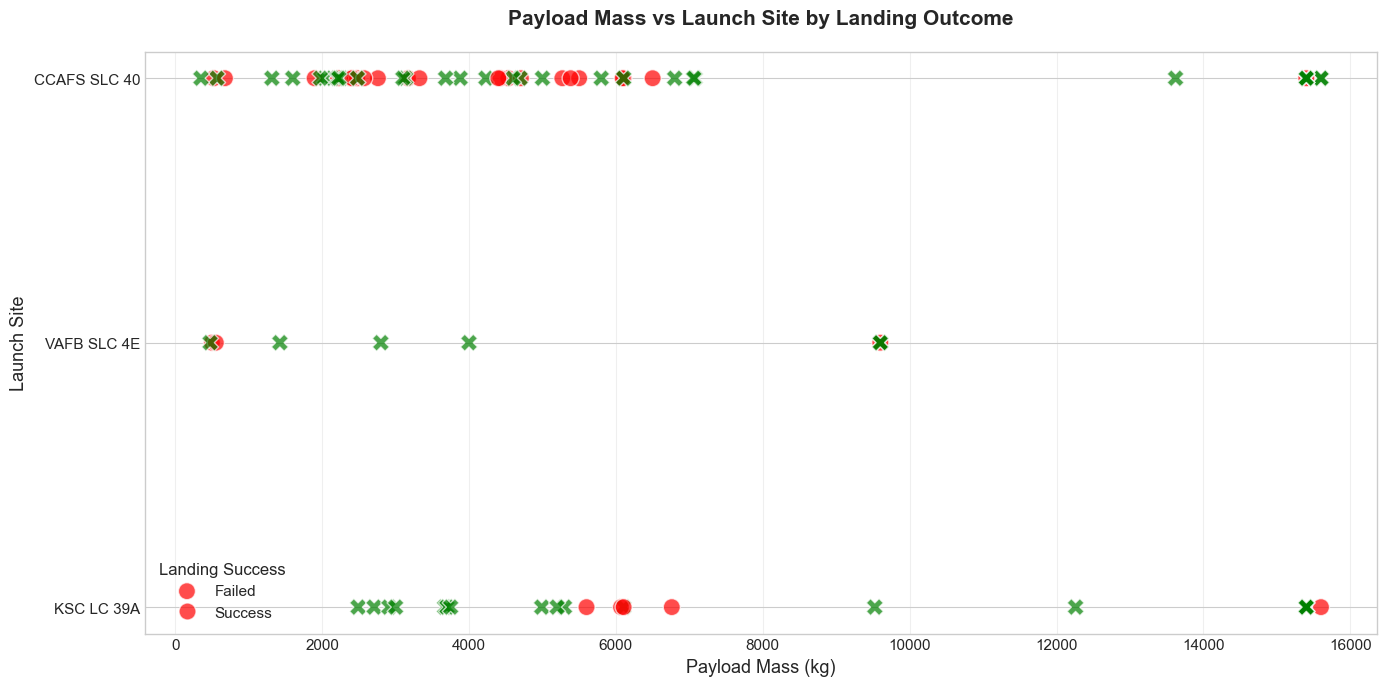


[Payload Statistics by Launch Site]
                  min       max     mean   median
LaunchSite                                       
CCAFS SLC 40  350.000 15600.000 5548.210 4400.000
KSC LC 39A   2490.000 15600.000 7606.450 5835.000
VAFB SLC 4E   475.000  9600.000 5919.460 9600.000

INSIGHTS:
- VAFB-SLC shows no heavy payload launches (>10,000 kg)
- This could indicate site-specific constraints or mission types
- Different sites may specialize in different payload ranges



In [7]:
# TASK 2: Payload Mass vs Launch Site

print("\n[TASK 2] Relationship: Payload Mass vs Launch Site")
print("-" * 60)

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", 
                hue="Class", style="Class", s=150, alpha=0.7,
                palette={0: 'red', 1: 'green'})
plt.xlabel("Payload Mass (kg)", fontsize=13)
plt.ylabel("Launch Site", fontsize=13)
plt.title("Payload Mass vs Launch Site by Landing Outcome", 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Landing Success', labels=['Failed', 'Success'], 
           fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Analyze payload capacity by site
payload_by_site = df.groupby('LaunchSite')['PayloadMass'].agg(['min', 'max', 'mean', 'median'])
print("\n[Payload Statistics by Launch Site]")
print(payload_by_site.round(2))

print("""
INSIGHTS:
- VAFB-SLC shows no heavy payload launches (>10,000 kg)
- This could indicate site-specific constraints or mission types
- Different sites may specialize in different payload ranges
""")


[TASK 3] Success Rate Analysis by Orbit Type
------------------------------------------------------------
       Total_Launches  Successful  Success_Rate  Success_Rate_Pct
Orbit                                                            
ES-L1               1           1         1.000           100.000
GEO                 1           1         1.000           100.000
HEO                 1           1         1.000           100.000
SSO                 5           5         1.000           100.000
VLEO               14          12         0.857            85.700
LEO                 7           5         0.714            71.400
PO                  9           6         0.667            66.700
MEO                 3           2         0.667            66.700
ISS                21          13         0.619            61.900
GTO                27          14         0.519            51.900
SO                  1           0         0.000             0.000


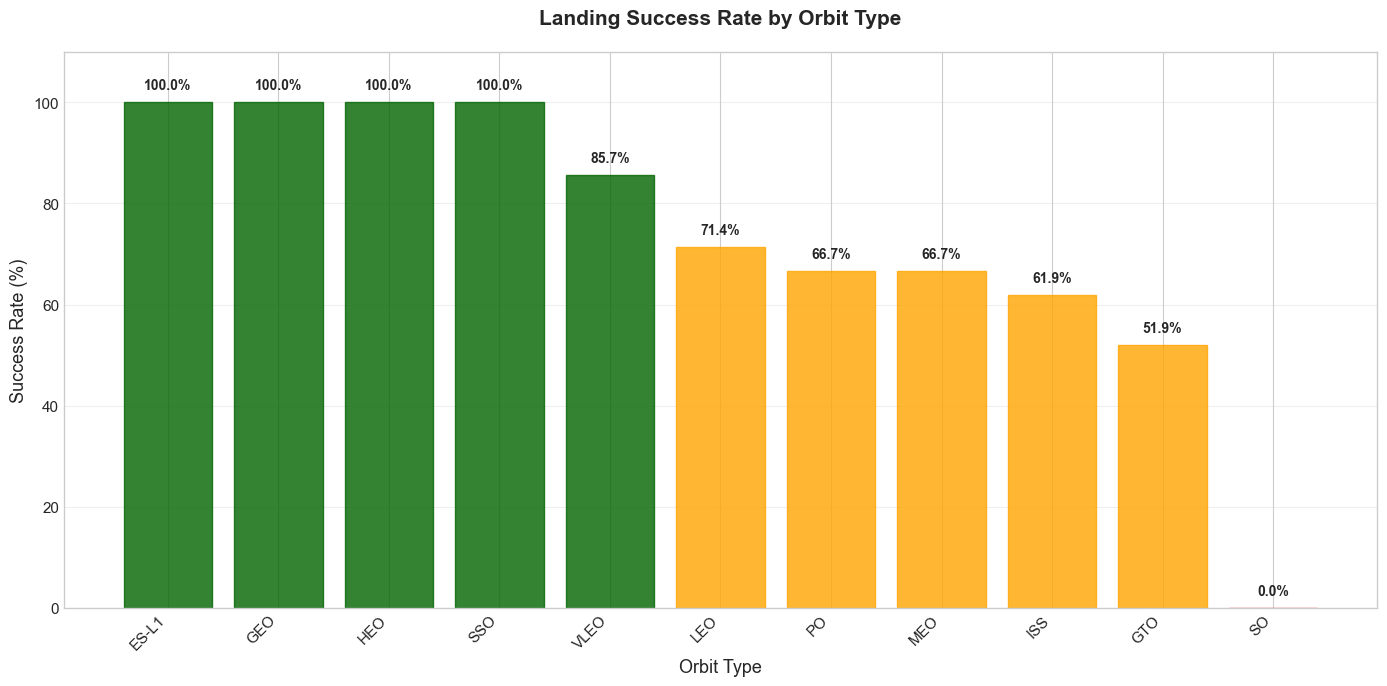


INSIGHTS:
- Certain orbits show significantly higher success rates
- ES-L1, GEO, HEO, and SSO orbits demonstrate strong performance
- GTO orbit shows moderate success despite high usage
- Orbit type is a strong predictor of landing success



In [8]:
# TASK 3: Success Rate by Orbit Type

print("\n[TASK 3] Success Rate Analysis by Orbit Type")
print("-" * 60)

# Calculate success rate by orbit
orbit_success = df.groupby('Orbit')['Class'].agg(['count', 'sum', 'mean']).round(3)
orbit_success.columns = ['Total_Launches', 'Successful', 'Success_Rate']
orbit_success['Success_Rate_Pct'] = (orbit_success['Success_Rate'] * 100).round(2)
orbit_success = orbit_success.sort_values('Success_Rate_Pct', ascending=False)

print(orbit_success)

# Visualize with bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(orbit_success.index, orbit_success['Success_Rate_Pct'], 
               color='steelblue', alpha=0.8, edgecolor='black')

# Color code bars by success rate
colors = ['darkgreen' if x >= 75 else 'orange' if x >= 50 else 'red' 
          for x in orbit_success['Success_Rate_Pct']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add value labels on bars
for i, v in enumerate(orbit_success['Success_Rate_Pct']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

plt.xlabel("Orbit Type", fontsize=13)
plt.ylabel("Success Rate (%)", fontsize=13)
plt.title("Landing Success Rate by Orbit Type", 
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 110)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("""
INSIGHTS:
- Certain orbits show significantly higher success rates
- ES-L1, GEO, HEO, and SSO orbits demonstrate strong performance
- GTO orbit shows moderate success despite high usage
- Orbit type is a strong predictor of landing success
""")


[TASK 4] Relationship: Flight Number vs Orbit Type
------------------------------------------------------------


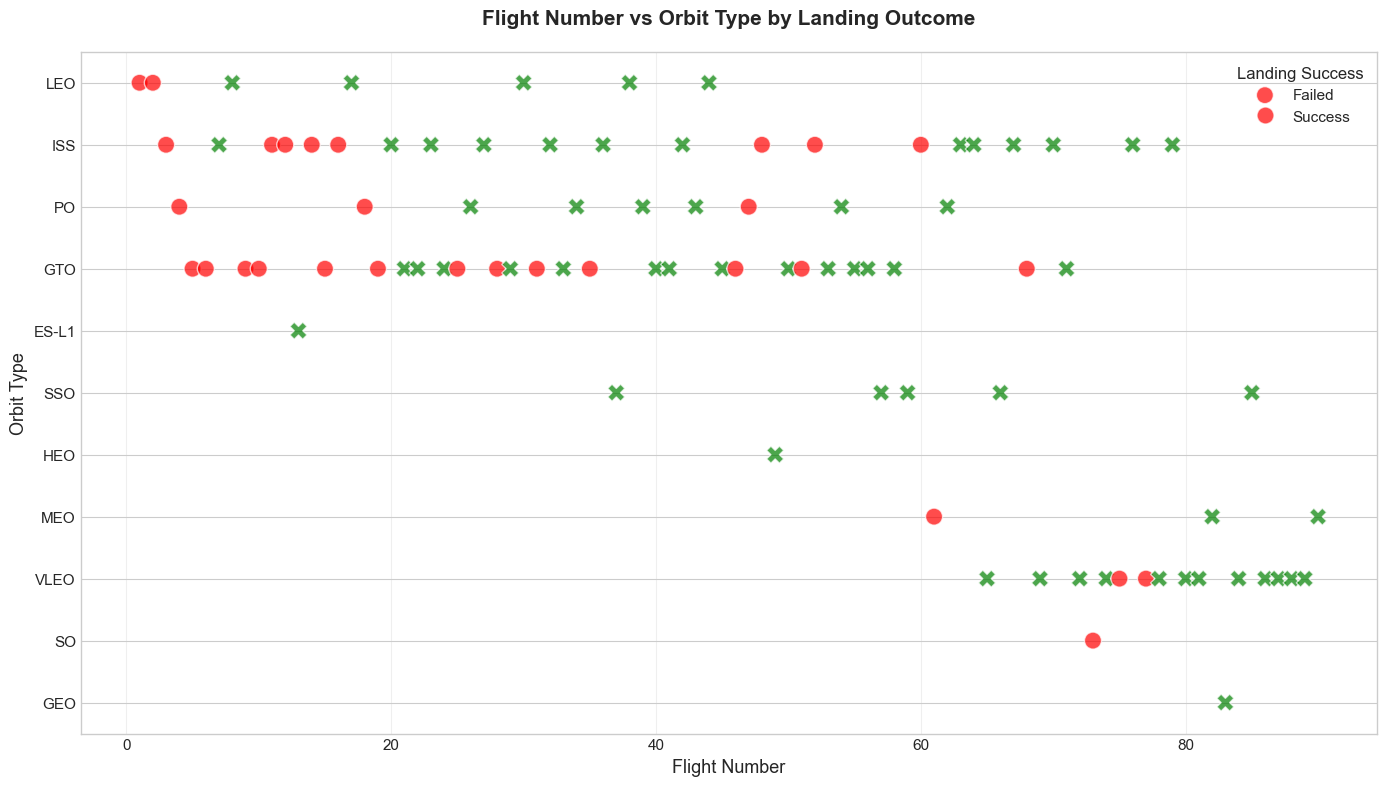


INSIGHTS:
- LEO orbit: Success rate improves with flight number (experience effect)
- GTO orbit: Success appears less correlated with flight number
- Different orbit types may require different landing strategies
- SpaceX's learning curve is more visible in frequently-used orbits



In [9]:
# TASK 4: Flight Number vs Orbit Type

print("\n[TASK 4] Relationship: Flight Number vs Orbit Type")
print("-" * 60)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="FlightNumber", y="Orbit", 
                hue="Class", style="Class", s=150, alpha=0.7,
                palette={0: 'red', 1: 'green'})
plt.xlabel("Flight Number", fontsize=13)
plt.ylabel("Orbit Type", fontsize=13)
plt.title("Flight Number vs Orbit Type by Landing Outcome", 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Landing Success', labels=['Failed', 'Success'], 
           fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("""
INSIGHTS:
- LEO orbit: Success rate improves with flight number (experience effect)
- GTO orbit: Success appears less correlated with flight number
- Different orbit types may require different landing strategies
- SpaceX's learning curve is more visible in frequently-used orbits
""")


[TASK 5] Relationship: Payload Mass vs Orbit Type
------------------------------------------------------------


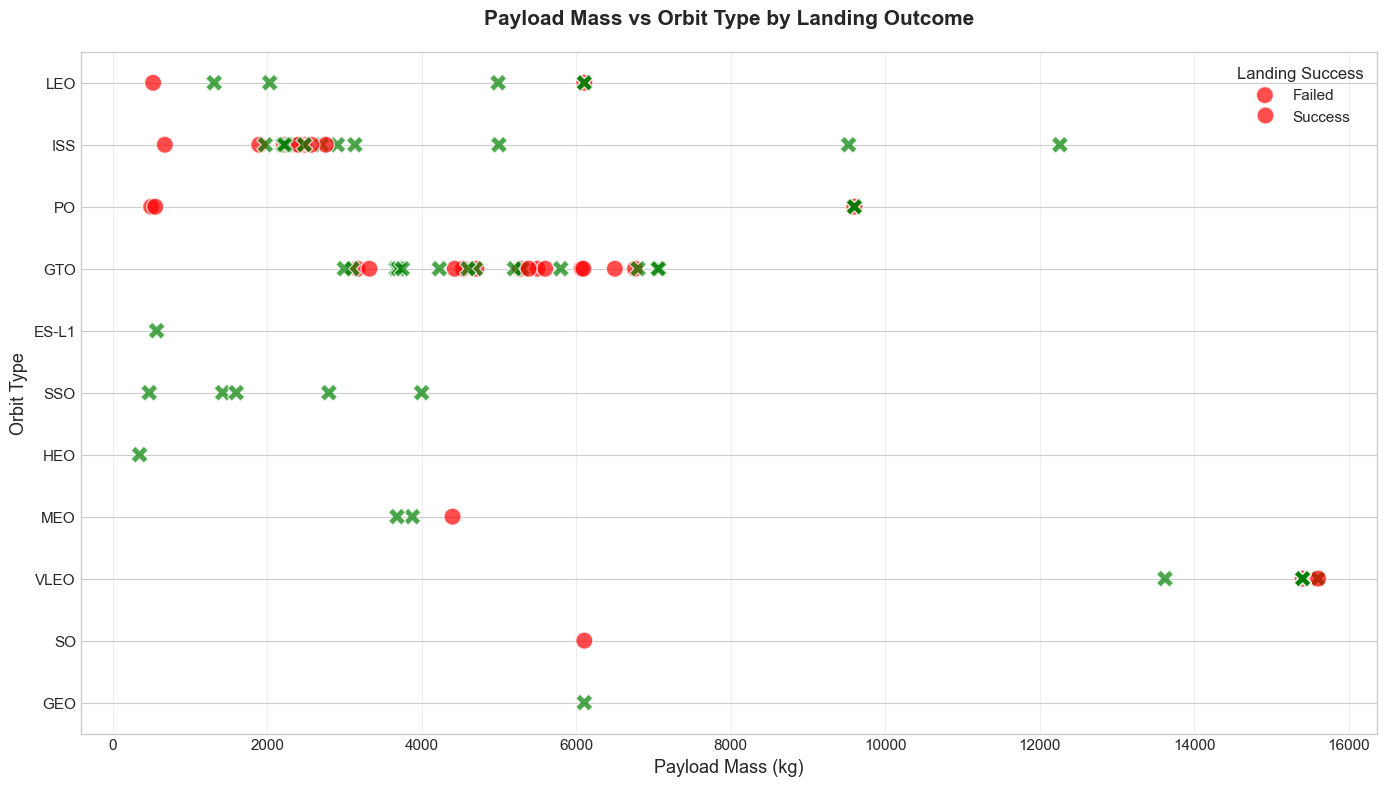


INSIGHTS:
- Heavy payloads show better success in Polar, LEO, and ISS orbits
- GTO orbit: Mixed results across payload ranges
- Payload-orbit combinations require careful mission planning
- Some orbits are better suited for heavy payload recovery



In [10]:
# TASK 5: Payload Mass vs Orbit Type

print("\n[TASK 5] Relationship: Payload Mass vs Orbit Type")
print("-" * 60)

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x="PayloadMass", y="Orbit", 
                hue="Class", style="Class", s=150, alpha=0.7,
                palette={0: 'red', 1: 'green'})
plt.xlabel("Payload Mass (kg)", fontsize=13)
plt.ylabel("Orbit Type", fontsize=13)
plt.title("Payload Mass vs Orbit Type by Landing Outcome", 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(title='Landing Success', labels=['Failed', 'Success'], 
           fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("""
INSIGHTS:
- Heavy payloads show better success in Polar, LEO, and ISS orbits
- GTO orbit: Mixed results across payload ranges
- Payload-orbit combinations require careful mission planning
- Some orbits are better suited for heavy payload recovery
""")


[TASK 6] Temporal Analysis: Launch Success Yearly Trend
------------------------------------------------------------

[Yearly Launch Statistics]
      Total_Launches  Successful  Success_Rate  Success_Rate_Pct
Year                                                            
2010               1           0         0.000             0.000
2012               1           0         0.000             0.000
2013               3           0         0.000             0.000
2014               6           2         0.333            33.300
2015               6           2         0.333            33.300
2016               8           5         0.625            62.500
2017              18          15         0.833            83.300
2018              18          11         0.611            61.100
2019              10           9         0.900            90.000
2020              19          16         0.842            84.200


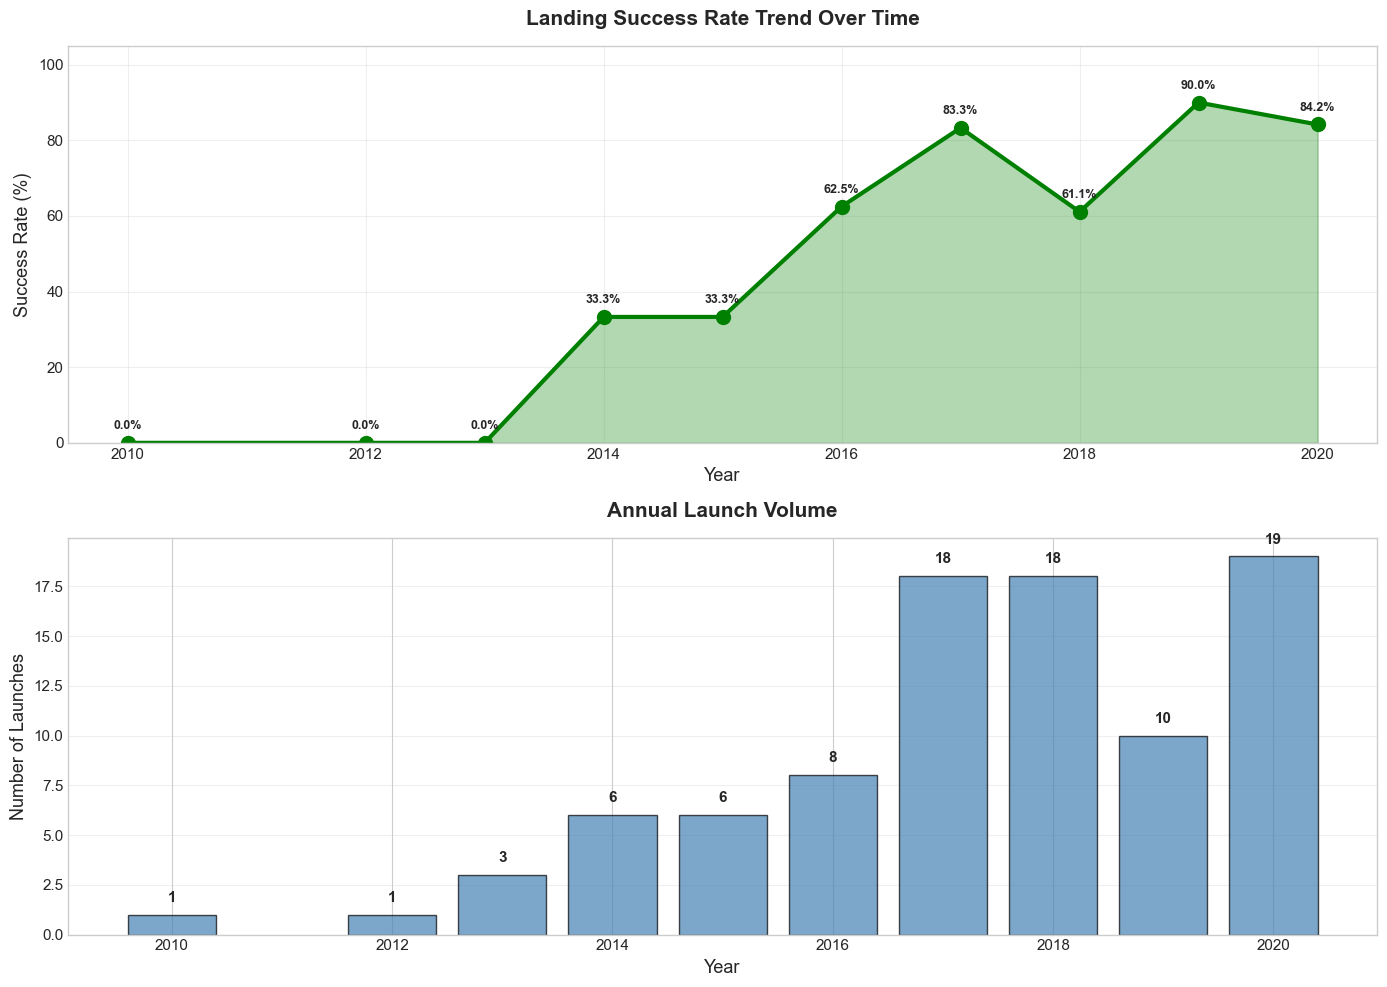


KEY TRENDS:
- Significant improvement in success rate from 2013 onwards
- Success rate stabilized around 2014, then continued upward
- After 2015, consistent improvement in landing reliability
- Demonstrates SpaceX's iterative learning and technology improvements



In [11]:
# TASK 6: Launch Success Yearly Trend

print("\n[TASK 6] Temporal Analysis: Launch Success Yearly Trend")
print("-" * 60)

# Extract year from date
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculate yearly success rate
yearly_stats = df.groupby('Year').agg({
    'Class': ['count', 'sum', 'mean']
}).round(3)
yearly_stats.columns = ['Total_Launches', 'Successful', 'Success_Rate']
yearly_stats['Success_Rate_Pct'] = (yearly_stats['Success_Rate'] * 100).round(2)

print("\n[Yearly Launch Statistics]")
print(yearly_stats)

# Visualize trend
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Success rate trend
ax1.plot(yearly_stats.index, yearly_stats['Success_Rate_Pct'], 
         marker='o', linewidth=3, markersize=10, color='green')
ax1.fill_between(yearly_stats.index, yearly_stats['Success_Rate_Pct'], 
                  alpha=0.3, color='green')
ax1.set_xlabel("Year", fontsize=13)
ax1.set_ylabel("Success Rate (%)", fontsize=13)
ax1.set_title("Landing Success Rate Trend Over Time", 
              fontsize=15, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 105)

# Add annotations for key milestones
for year, rate in zip(yearly_stats.index, yearly_stats['Success_Rate_Pct']):
    ax1.annotate(f'{rate:.1f}%', 
                xy=(year, rate), 
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontweight='bold',
                fontsize=9)

# Plot 2: Launch volume over time
ax2.bar(yearly_stats.index, yearly_stats['Total_Launches'], 
        color='steelblue', alpha=0.7, edgecolor='black')
ax2.set_xlabel("Year", fontsize=13)
ax2.set_ylabel("Number of Launches", fontsize=13)
ax2.set_title("Annual Launch Volume", 
              fontsize=15, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for year, count in zip(yearly_stats.index, yearly_stats['Total_Launches']):
    ax2.text(year, count + 0.5, str(int(count)), 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("""
KEY TRENDS:
- Significant improvement in success rate from 2013 onwards
- Success rate stabilized around 2014, then continued upward
- After 2015, consistent improvement in landing reliability
- Demonstrates SpaceX's iterative learning and technology improvements
""")

## 4)FEATURE ENGINEERING

In [12]:
print("\n" + "="*80)
print("FEATURE ENGINEERING FOR PREDICTIVE MODELING")
print("="*80)

# Select relevant features for modeling
feature_columns = ['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 
                   'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 
                   'Block', 'ReusedCount', 'Serial']

features = df[feature_columns].copy()

print("\n[Selected Features]")
print(features.head(10))

print("\n[Feature Data Types]")
print(features.dtypes)

print("\n[Feature Statistics]")
print(features.describe())


FEATURE ENGINEERING FOR PREDICTIVE MODELING

[Selected Features]
   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1     6104.959   LEO  CCAFS SLC 40        1     False   False   
1             2      525.000   LEO  CCAFS SLC 40        1     False   False   
2             3      677.000   ISS  CCAFS SLC 40        1     False   False   
3             4      500.000    PO   VAFB SLC 4E        1     False   False   
4             5     3170.000   GTO  CCAFS SLC 40        1     False   False   
5             6     3325.000   GTO  CCAFS SLC 40        1     False   False   
6             7     2296.000   ISS  CCAFS SLC 40        1     False   False   
7             8     1316.000   LEO  CCAFS SLC 40        1     False   False   
8             9     4535.000   GTO  CCAFS SLC 40        1     False   False   
9            10     4428.000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False       

In [13]:
# TASK 7: One-Hot Encoding for Categorical Variables

print("\n[TASK 7] One-Hot Encoding Categorical Features")
print("-" * 60)

# Identify categorical columns
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

print(f"\nCategorical columns to encode: {categorical_columns}")
print("\nUnique values per categorical feature:")
for col in categorical_columns:
    print(f"  - {col}: {features[col].nunique()} unique values")

# Apply one-hot encoding
features_one_hot = pd.get_dummies(features, columns=categorical_columns, 
                                   drop_first=False)

print(f"\n✓ One-hot encoding completed")
print(f"  - Original features: {features.shape[1]}")
print(f"  - Encoded features: {features_one_hot.shape[1]}")
print(f"  - New features created: {features_one_hot.shape[1] - features.shape[1]}")

print("\n[Encoded Dataset Sample]")
print(features_one_hot.head())

# Display new columns created
new_columns = [col for col in features_one_hot.columns if col not in features.columns]
print(f"\n[New Encoded Features ({len(new_columns)} total)]")
for i, col in enumerate(new_columns[:10], 1):
    print(f"  {i}. {col}")
if len(new_columns) > 10:
    print(f"  ... and {len(new_columns) - 10} more")


[TASK 7] One-Hot Encoding Categorical Features
------------------------------------------------------------

Categorical columns to encode: ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

Unique values per categorical feature:
  - Orbit: 11 unique values
  - LaunchSite: 3 unique values
  - LandingPad: 5 unique values
  - Serial: 53 unique values

✓ One-hot encoding completed
  - Original features: 12
  - Encoded features: 80
  - New features created: 68

[Encoded Dataset Sample]
   FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1     6104.959        1     False   False  False  1.000   
1             2      525.000        1     False   False  False  1.000   
2             3      677.000        1     False   False  False  1.000   
3             4      500.000        1     False   False  False  1.000   
4             5     3170.000        1     False   False  False  1.000   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \


In [14]:
# TASK 8: Convert All Features to float64

print("\n[TASK 8] Converting All Features to float64")
print("-" * 60)

# Check current data types
print("\nData types before conversion:")
print(features_one_hot.dtypes.value_counts())

# Convert to float64
features_one_hot = features_one_hot.astype('float64')

print("\n✓ Conversion completed")
print("\nData types after conversion:")
print(features_one_hot.dtypes.value_counts())

# Verify conversion
print("\n[Final Feature Matrix Summary]")
print(f"  - Shape: {features_one_hot.shape}")
print(f"  - Memory: {features_one_hot.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  - All numeric: {features_one_hot.select_dtypes(include=[np.number]).shape[1] == features_one_hot.shape[1]}")

# Display final dataset
print("\n[Final Engineered Features (First 5 rows)]")
print(features_one_hot.head())


[TASK 8] Converting All Features to float64
------------------------------------------------------------

Data types before conversion:
bool       75
int64       3
float64     2
Name: count, dtype: int64

✓ Conversion completed

Data types after conversion:
float64    80
Name: count, dtype: int64

[Final Feature Matrix Summary]
  - Shape: (90, 80)
  - Memory: 0.06 MB
  - All numeric: True

[Final Engineered Features (First 5 rows)]
   FlightNumber  PayloadMass  Flights  GridFins  Reused  Legs  Block  \
0         1.000     6104.959    1.000     0.000   0.000 0.000  1.000   
1         2.000      525.000    1.000     0.000   0.000 0.000  1.000   
2         3.000      677.000    1.000     0.000   0.000 0.000  1.000   
3         4.000      500.000    1.000     0.000   0.000 0.000  1.000   
4         5.000     3170.000    1.000     0.000   0.000 0.000  1.000   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0        0.000        0.000      0.000      0.000      

## 5) FEATURE IMPORTANCE ANALYSIS


FEATURE IMPORTANCE & CORRELATION ANALYSIS

[Correlation with Landing Success]

Top 15 Positive Correlations:
Class                                 1.000
Legs                                  0.674
GridFins                              0.643
ReusedCount                           0.467
Block                                 0.416
FlightNumber                          0.402
LandingPad_5e9e3032383ecb6bb234e7ca   0.322
LandingPad_5e9e3032383ecb267a34e7c7   0.223
LandingPad_5e9e3033383ecbb9e534e7cc   0.208
Reused                                0.208
PayloadMass                           0.200
Serial_B1049                          0.189
Orbit_VLEO                            0.173
Serial_B1051                          0.171
Orbit_SSO                             0.171
Name: Class, dtype: float64

Top 15 Negative Correlations:
Serial_B1037                          -0.150
Serial_B1012                          -0.150
Serial_B1020                          -0.150
Serial_B1004                        

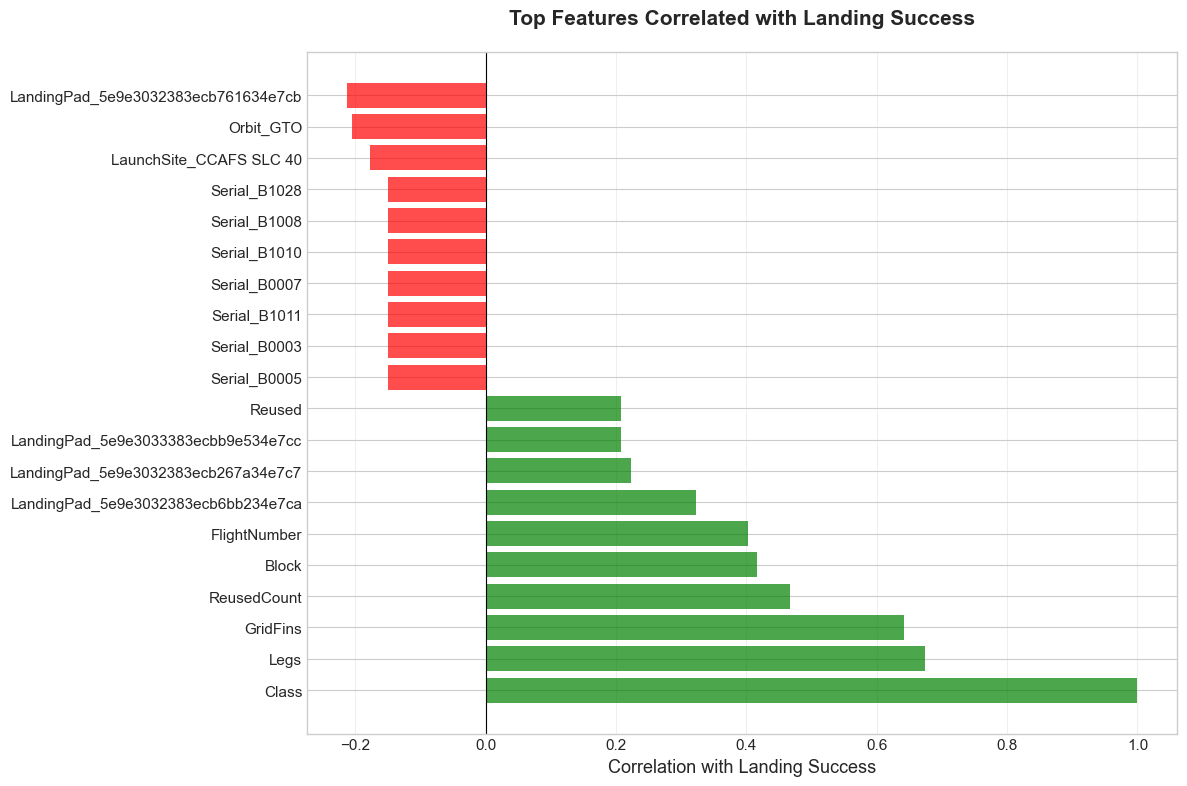

In [15]:
print("\n" + "="*80)
print("FEATURE IMPORTANCE & CORRELATION ANALYSIS")
print("="*80)

# Correlation with target variable
print("\n[Correlation with Landing Success]")

# Add target variable
features_with_target = features_one_hot.copy()
features_with_target['Class'] = df['Class'].values

# Calculate correlations
correlations = features_with_target.corr()['Class'].sort_values(ascending=False)
print("\nTop 15 Positive Correlations:")
print(correlations.head(15))

print("\nTop 15 Negative Correlations:")
print(correlations.tail(15))

# Visualize top correlations
top_features = pd.concat([correlations.head(10), correlations.tail(10)])
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in top_features.values]
plt.barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features.index)
plt.xlabel("Correlation with Landing Success", fontsize=13)
plt.title("Top Features Correlated with Landing Success", 
          fontsize=15, fontweight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 6) EXPORT PROCESSED DATA

In [16]:
# Export engineered features
output_file = 'dataset_part_3_engineered.csv'
features_one_hot.to_csv(output_file, index=False)

print(f"\n Engineered features exported to: {output_file}")
print(f"  - Rows: {features_one_hot.shape[0]}")
print(f"  - Columns: {features_one_hot.shape[1]}")
print(f"  - File size: {pd.read_csv(output_file).memory_usage(deep=True).sum() / 1024**2:.2f} MB")


 Engineered features exported to: dataset_part_3_engineered.csv
  - Rows: 90
  - Columns: 80
  - File size: 0.06 MB


## 7) SUMMARY & KEY FINDINGS

In [17]:
print(f"""
DATASET OVERVIEW:
-----------------
- Total launches analyzed: {len(df)}
- Successful landings: {df['Class'].sum()}
- Overall success rate: {df['Class'].mean() * 100:.2f}%
- Time period: {df['Year'].min()} - {df['Year'].max()}
- Launch sites: {df['LaunchSite'].nunique()}
- Orbit types: {df['Orbit'].nunique()}

KEY INSIGHTS:
-------------
1. TEMPORAL TRENDS:
   - Clear improvement in success rate over time
   - Success rate increased from {yearly_stats.iloc[0]['Success_Rate_Pct']:.1f}% ({yearly_stats.index[0]}) 
     to {yearly_stats.iloc[-1]['Success_Rate_Pct']:.1f}% ({yearly_stats.index[-1]})
   - Demonstrates strong learning curve and technology improvements

2. FLIGHT EXPERIENCE:
   - Flight number positively correlates with success
   - Early missions showed higher failure rates
   - Experience accumulation is a significant factor

3. PAYLOAD CONSIDERATIONS:
   - Heavier payloads generally show lower success rates
   - Trade-off between payload mass and landing feasibility
   - Some orbits handle heavy payloads better than others

4. LAUNCH SITE PERFORMANCE:
   - Success rates vary significantly by launch site
   - Site selection is a strategic factor in mission planning
   - Some sites show specialized capabilities

5. ORBIT-SPECIFIC PATTERNS:
   - LEO missions: Success improves with experience
   - GTO missions: Less consistent, more challenging
   - High success rates: {', '.join(orbit_success.head(3).index.tolist())}
   - Lower success rates: {', '.join(orbit_success.tail(3).index.tolist())}

6. FEATURE ENGINEERING RESULTS:
   - Original features: {len(feature_columns)}
   - Engineered features: {features_one_hot.shape[1]}
   - Ready for machine learning models
   - All features normalized to float64
""")

print("\n" + "="*80)
print("ANALYSIS COMPLETE ")
print("="*80)


DATASET OVERVIEW:
-----------------
- Total launches analyzed: 90
- Successful landings: 60
- Overall success rate: 66.67%
- Time period: 2010 - 2020
- Launch sites: 3
- Orbit types: 11

KEY INSIGHTS:
-------------
1. TEMPORAL TRENDS:
   - Clear improvement in success rate over time
   - Success rate increased from 0.0% (2010) 
     to 84.2% (2020)
   - Demonstrates strong learning curve and technology improvements

2. FLIGHT EXPERIENCE:
   - Flight number positively correlates with success
   - Early missions showed higher failure rates
   - Experience accumulation is a significant factor

3. PAYLOAD CONSIDERATIONS:
   - Heavier payloads generally show lower success rates
   - Trade-off between payload mass and landing feasibility
   - Some orbits handle heavy payloads better than others

4. LAUNCH SITE PERFORMANCE:
   - Success rates vary significantly by launch site
   - Site selection is a strategic factor in mission planning
   - Some sites show specialized capabilities

5. ORBIT